In [1]:
from career_analysis import BiasFinder

/home/paper3/ir-bias/venv/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
def plot_career_stats(career_data_path='./career_data.tsv',
                      word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path=career_data_path,
                             word_pairs_path=word_pairs_path)
    sources = sorted(bias_finder.get_eligible_sources())
    
    options = {
        'x': 'Percentage of workers in occupation who are women',
        'y': 'Strength of association of occupation\n' \
             'word vector with female gender (WEFAT)',
        'kind': 'scatter',
        'xlim': (0, 100),
        'ylim': (-2.0, 2.0)
    }
    colors = ['black', 'blue', 'brown', 'gray', 'green', \
              'orange', 'pink', 'purple', 'red', 'yellow']

    df_all = pd.DataFrame([(-1, 0)], columns=[options['x'], options['y']])
    df_all = df_all.plot(**options, title='All news sources')
    
    for idx, source in enumerate(sources):
        data = bias_finder.calculate_wefat(source)
        df = pd.DataFrame(list(data.values()),
                          columns=[options['x'], options['y']])
        
        options['color'] = colors[idx]
        df.plot(**options, ax=df_all, s=30)         # aggregated plot
        df.plot(**options, s=60, title=str(source)) # individual plot

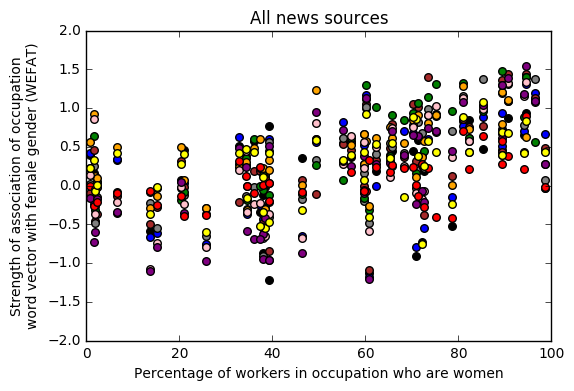

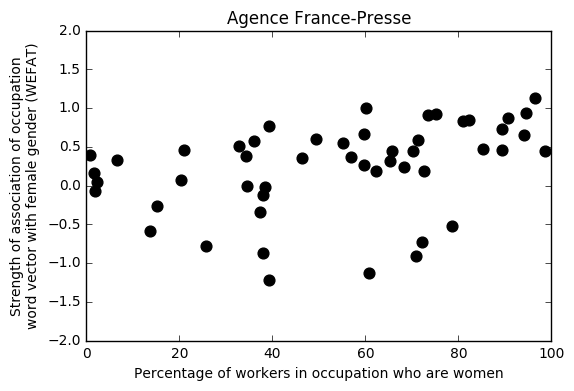

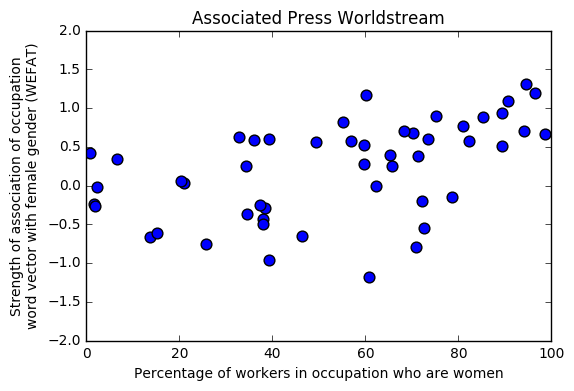

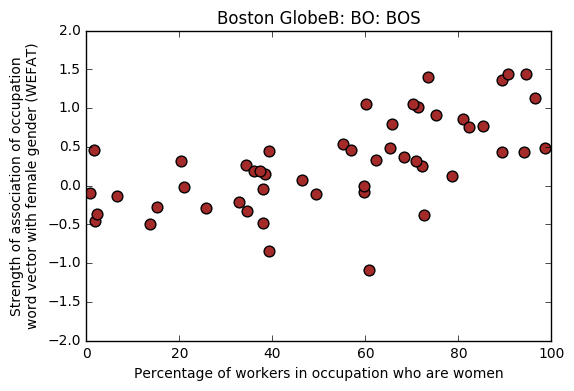

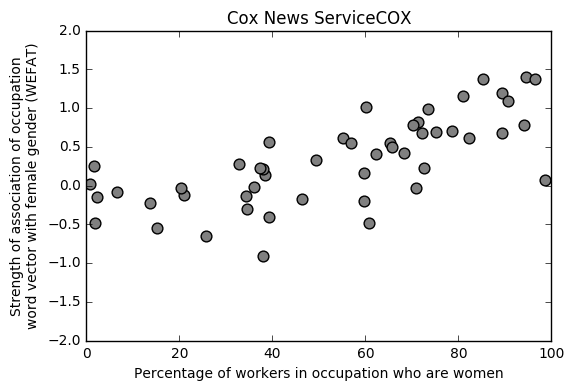

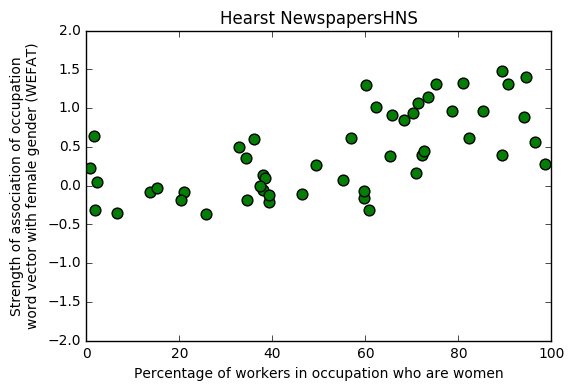

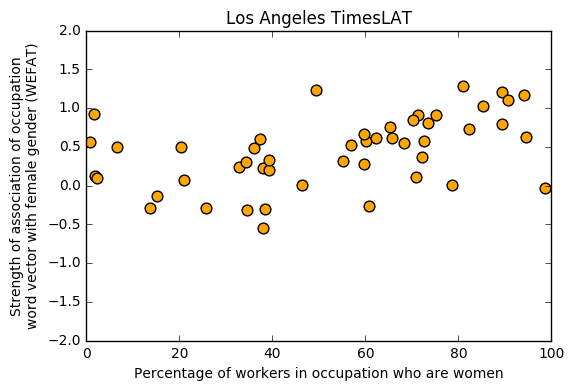

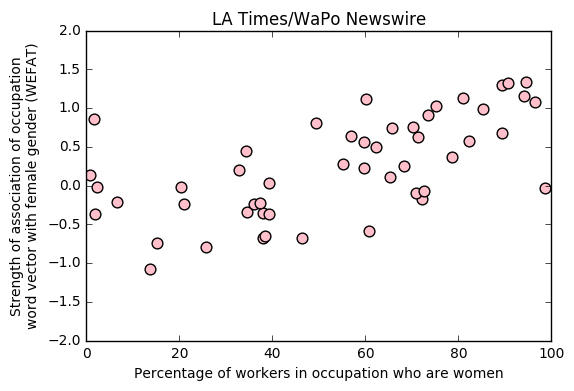

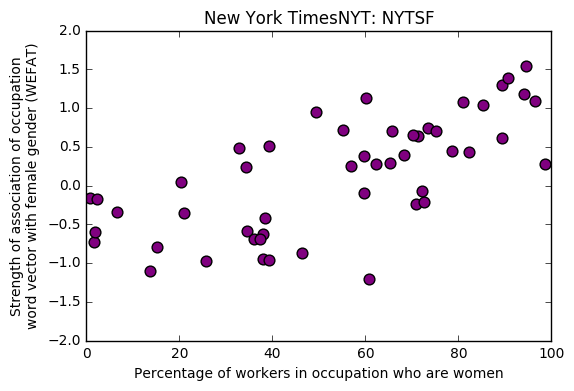

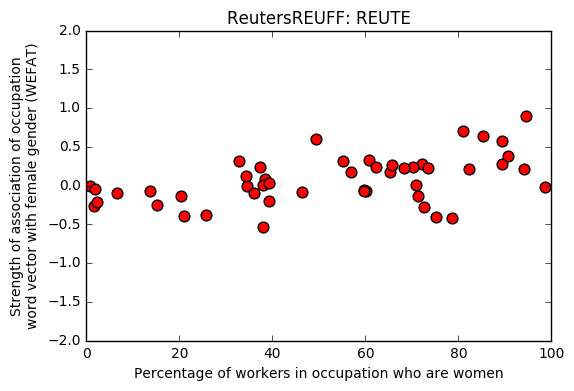

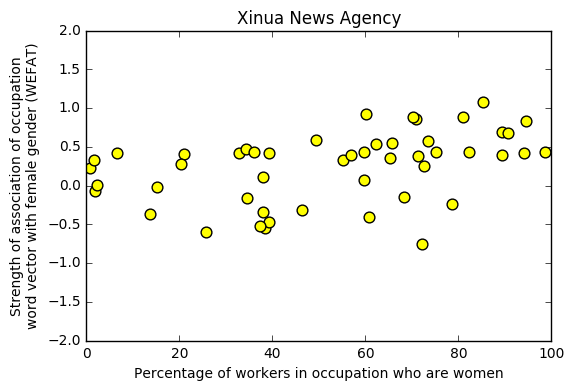

In [4]:
plot_career_stats()

In [5]:
def plot_career_stats_golden(career_data_path='./career_data.tsv',
                             word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path=career_data_path,
                             word_pairs_path=word_pairs_path)

    x = 'Percentage of workers in occupation who are women'
    y = 'Strength of association of occupation\n' \
        'word vector with female gender (WEFAT)'
    
    data = bias_finder.calculate_wefat()
    df = pd.DataFrame(list(data.values()), columns=[x, y])

    df.plot(x=x,
            y=y,
            kind='scatter',
            color='yellow',
            s=60,
            title='Golden Model (Google News)',
            xlim=(0, 100),
            ylim=(-2.0, 2.0))

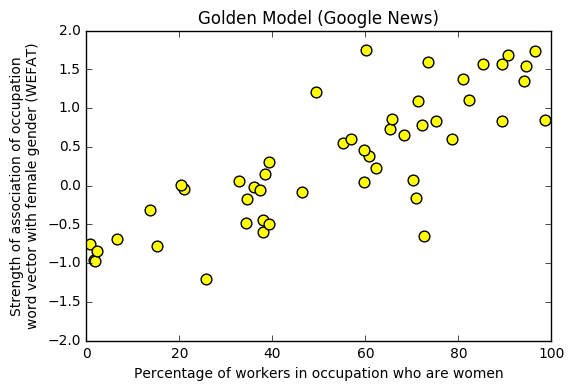

In [6]:
plot_career_stats_golden()